## Problem Set 5: Linear and Logistic Regression

### Name: Gabriella Rivera

### 1 How is a Basketball Game Score Calculated?

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

1.

In [62]:
basketball = pd.read_csv("fox-deaaron_23-24.csv.bz2", sep = ",")
basketball.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2023-10-25,25-309,SAC,@,UTA,W (+16),1,32:57,...,3,5,6,1,1,3,4,18,11.0,+14
1,2,2.0,2023-10-27,25-311,SAC,NaN,GSW,L (-8),1,39:09,...,4,4,4,2,0,2,3,39,27.4,+1
2,3,3.0,2023-10-29,25-313,SAC,NaN,LAL,W (+5),1,34:15,...,3,4,8,1,1,3,5,37,28.9,+15
3,4,NaN,2023-11-01,25-316,SAC,@,GSW,L (-1),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
4,5,NaN,2023-11-04,25-319,SAC,@,HOU,L (-18),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [63]:
basketball

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2023-10-25,25-309,SAC,@,UTA,W (+16),1,32:57,...,3,5,6,1,1,3,4,18,11.0,+14
1,2,2.0,2023-10-27,25-311,SAC,NaN,GSW,L (-8),1,39:09,...,4,4,4,2,0,2,3,39,27.4,+1
2,3,3.0,2023-10-29,25-313,SAC,NaN,LAL,W (+5),1,34:15,...,3,4,8,1,1,3,5,37,28.9,+15
3,4,NaN,2023-11-01,25-316,SAC,@,GSW,L (-1),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
4,5,NaN,2023-11-04,25-319,SAC,@,HOU,L (-18),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,70.0,2024-04-07,26-109,SAC,@,BRK,W (+30),1,33:50,...,4,5,3,1,0,1,3,20,11.6,+16
78,79,71.0,2024-04-09,26-111,SAC,@,OKC,L (-7),1,42:42,...,8,8,6,2,0,2,2,33,22.5,-3
79,80,72.0,2024-04-11,26-113,SAC,NaN,NOP,L (-12),1,40:45,...,5,5,8,2,0,6,3,33,25.9,+3
80,81,73.0,2024-04-12,26-114,SAC,NaN,PHO,L (-1),1,41:00,...,5,5,6,4,0,2,4,23,16.6,+3


2.

In [64]:
basketball[basketball['G'].isna()] 

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
3,4,NaN,2023-11-01,25-316,SAC,@,GSW,L (-1),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
4,5,NaN,2023-11-04,25-319,SAC,@,HOU,L (-18),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
5,6,NaN,2023-11-06,25-321,SAC,@,HOU,L (-25),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
6,7,NaN,2023-11-08,25-323,SAC,NaN,POR,W (+3),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
7,8,NaN,2023-11-10,25-325,SAC,NaN,OKC,W (+7),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
23,24,NaN,2023-12-16,25-361,SAC,NaN,UTA,W (+21),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
57,58,NaN,2024-02-28,26-070,SAC,@,DEN,L (-21),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
58,59,NaN,2024-03-01,26-072,SAC,@,MIN,W (+4),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [65]:
basketball = basketball[~basketball['G'].isna()]
basketball.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2023-10-25,25-309,SAC,@,UTA,W (+16),1,32:57,...,3,5,6,1,1,3,4,18,11.0,+14
1,2,2.0,2023-10-27,25-311,SAC,NaN,GSW,L (-8),1,39:09,...,4,4,4,2,0,2,3,39,27.4,+1
2,3,3.0,2023-10-29,25-313,SAC,NaN,LAL,W (+5),1,34:15,...,3,4,8,1,1,3,5,37,28.9,+15
8,9,4.0,2023-11-13,25-328,SAC,NaN,CLE,W (+12),1,35:52,...,1,2,6,1,0,1,2,28,21.6,+17
9,10,5.0,2023-11-15,25-330,SAC,@,LAL,W (+15),1,38:20,...,2,5,5,4,0,3,3,28,21.8,+15


In [66]:
basketball.shape

(74, 30)

DeAron Fox played 74 games

3.

In [67]:
print(type(basketball.G[1]))
print(type(basketball.PTS[1]))
print(type(basketball.DRB[1]))
print(type(basketball.TRB[1]))
print(type(basketball.AST[1]))
print(type(basketball.GmSc[1]))
print(type(basketball.FTA[1]))
print(type(basketball.FG[1]))

<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [68]:
columns_to_convert = ['PTS', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'FGA', 'FG', '3P', '3PA', 'FT', 'FTA', 'ORB'] 

# Applying pd.to_numeric to each column in the list
basketball[columns_to_convert] = basketball[columns_to_convert].apply(pd.to_numeric, errors='coerce')

C:\Users\Gabriella Rivera\AppData\Local\Temp\ipykernel_1336\970031929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketball[columns_to_convert] = basketball[columns_to_convert].apply(pd.to_numeric, errors='coerce')


4.

In [69]:
basketball['GmSc'].describe()

count    74.000000
mean     19.556757
std       8.337916
min      -5.400000
25%      14.900000
50%      20.150000
75%      26.500000
max      37.800000
Name: GmSc, dtype: float64

array([[<Axes: title={'center': 'GmSc'}>]], dtype=object)

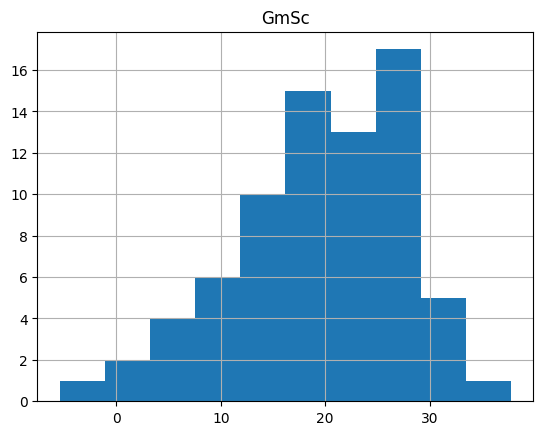

In [70]:
basketball.hist(column='GmSc')

The histogram resembles a normal distribution

5.

In [71]:
m1 = smf.ols("GmSc ~ FGA", data = basketball).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     23.31
Date:                Wed, 15 May 2024   Prob (F-statistic):           7.51e-06
Time:                        19:45:17   Log-Likelihood:                -251.06
No. Observations:                  74   AIC:                             506.1
Df Residuals:                      72   BIC:                             510.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8292      3.768      0.485      0.629      -5.683       9.341
FGA            0.8469      0.175      4.828      0.000       0.497       1.197
==============================================================================
Omnibus:                        2.998   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.152
Skew:                          -0.244   Prob(JB):                        0.341
Kurtosis:                       2.321   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a) This value represents the estimated game score when the number of field goal attempts (FGA) is zero.  The p-value associated with the intercept is 0.629, indicating that the intercept is not statistically significant at common significance levels 

b) This coefficient means that, on average, each additional field goal attempt is associated with an increase of about 0.847 points in the game score. This suggests a positive relationship between the number of shots attempted and the overall game score. The p-value for FGA is 0.000, indicating that the number of field goal attempts is statistically significant in predicting the game score.

6.

In [72]:
m2 = smf.ols('GmSc ~ FG + FGA', data = basketball).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 15 May 2024   Prob (F-statistic):           3.01e-22
Time:                        19:45:17   Log-Likelihood:                -209.79
No. Observations:                  74   AIC:                             425.6
Df Residuals:                      71   BIC:                             432.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5109      2.184      2.066      0.043       0.156       8.866
FG             2.9093      0.241     12.067      0.000       2.429       3.390
FGA           -0.6335      0.159     -3.985      0.000      -0.951      -0.317
==============================================================================
Omnibus:                        0.881   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.968
Skew:                           0.179   Prob(JB):                        0.616
Kurtosis:                       2.568   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a) Yes, FG is statistically significant. This coefficient means that, on average, each additional field goal is associated with an increase of about 2.9093 points in the game score. The p-value for FG is 0.000, indicating that the number of field goal attempts is statistically significant in predicting the game score.

b) This coefficient means that, on average, each additional field goal attempt is associated with an decrease of about 0.6335 points in the game score, assuming the number of successful field goals is held constant.This suggests a negative relationship between the number of shots attempted and the overall game score. The p-value for FGA is 0.000, indicating that the number of field goal attempts is statistically significant in predicting the game score.

c) In simple regression (model 1), FGA might show a positive coefficient if not controlling for FG because attempts are generally correlated with scoring. More attempts might correlate with more scoring opportunities overall. However, in multiple regression (model 2), when controlling for the actual successful shots (FG), the mere attempts (FGA) show a negative impact. This indicates that attempts without success (inefficient shooting) negatively impact the game score. 

d) R2 of model 1 is .245  whereas  R2 of model 2 is .752 . This indicated that model 2 is a more accurate interpretation of game score and factors that affect it. An increased R2 value suggests a more accurate fit.
 0.752 indicates that about 75.2% of the variance in the game score is explained by the number of field goals made and the number of attempts, whereas 0.245 indicates that approximately 24.5% of the variability in the game score is explained by the number of field goal attempts alone.

7.

In [73]:
m3 = smf.ols('GmSc ~ FG + FGA + Q("3P") + Q("3PA") + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF', data = basketball).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.771e+29
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        19:45:17   Log-Likelihood:                 2173.8
No. Observations:                  74   AIC:                            -4320.
Df Residuals:                      60   BIC:                            -4287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.377e-14   3.06e-14      0.450      0.654   -4.75e-14     7.5e-14
FG             2.4000   3.81e-15   6.29e+14      0.000       2.400       2.400
FGA           -0.7000   2.72e-15  -2.57e+14      0.000      -0.700      -0.700
Q("3P")        1.0000   6.36e-15   1.57e+14      0.000       1.000       1.000
Q("3PA")   -1.443e-15   4.06e-15     -0.355      0.724   -9.57e-15    6.69e-15
FT             1.4000   5.68e-15   2.47e+14      0.000       1.400       1.400
FTA           -0.4000   4.44e-15  -9.02e+13      0.000      -0.400      -0.400
ORB            0.7000   6.55e-15   1.07e+14      0.000       0.700       0.700
DRB            0.3000   3.32e-15   9.05e+13      0.000       0.300       0.300
AST            0.7000   2.29e-15   3.06e+14      0.000       0.700       0.700
STL            1.0000   4.42e-15   2.26e+14      0.000       1.000       1.000
BLK            0.7000   1.08e-14   6.51e+13      0.000       0.700       0.700
TOV           -1.0000   3.74e-15  -2.67e+14      0.000      -1.000      -1.000
PF            -0.4000   4.86e-15  -8.23e+13      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.294
Skew:                           0.323   Prob(JB):                        0.524
Kurtosis:                       2.950   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a) Standard errors are significantly smaller in this model for most coefficients, suggesting that the estimates are precise. T values are significantly higher, yet quite varied. High absolute t-values (like those for FG, FGA, FT) indicate strong evidence against the null hypothesis for these predictors, suggesting they are significant contributors to the model.

b) The R2 of this model is 1.00 which means that the model can predict everything. This tells us that game score can be calculated, predicted, more or less based upon multiple regression using these coefficients. R² = 1.00 implies perfect explanatory power of the model regarding the variability in the game score. This could suggest overfitting, especially in real-world data.

c) TOV coefficient suggests that turnovers have a negative impact on the game score. -1.000 indicates that TOV results in the loss of 1 point per turnover,controlling for other factors. p-value of 0.000 indicates this is a reliable estimate.

8. 

Yes, I recovered the same formula :)

### 2 Model AirBnB Price

#### 2.1 Load and Clean 

1.

In [74]:
airbnb = pd.read_csv('airbnb-bangkok-listings.csv.bz2', sep=',', usecols=['bedrooms', 'price', 'accommodates', 'room_type'])
airbnb.head()

,room_type,accommodates,bedrooms,price
0,Entire home/apt,3,1.0,"$1,845.00"
1,Private room,2,1.0,"$1,275.00"
2,Private room,2,1.0,$800.00
3,Private room,2,1.0,$800.00
4,Private room,2,1.0,"$1,845.00"


2.

a)

In [75]:
airbnb['price'] = airbnb['price'].str.replace('$', '')  # Remove dollar sign
airbnb['price'] = airbnb['price'].str.replace(',', '')  # Remove commas

airbnb['price'] = pd.to_numeric(airbnb['price'])

In [76]:
# airbnb[['bedrooms', 'price', 'accommodates']]
print(type(airbnb['bedrooms'][0]))
print(type(airbnb['accommodates'][0]))

<class 'numpy.float64'>
<class 'numpy.int64'>


b)

In [77]:
clean_airbnb = airbnb.dropna(subset=['bedrooms', 'price', 'accommodates', 'room_type'])

In [78]:
clean_airbnb.isna().any()

room_type       False
accommodates    False
bedrooms        False
price           False
dtype: bool

3.

In [79]:
clean_airbnb['price'].describe()

count     15200.000000
mean       2283.865329
std        7008.449939
min           6.000000
25%         772.000000
50%        1200.000000
75%        2000.000000
max      335482.000000
Name: price, dtype: float64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

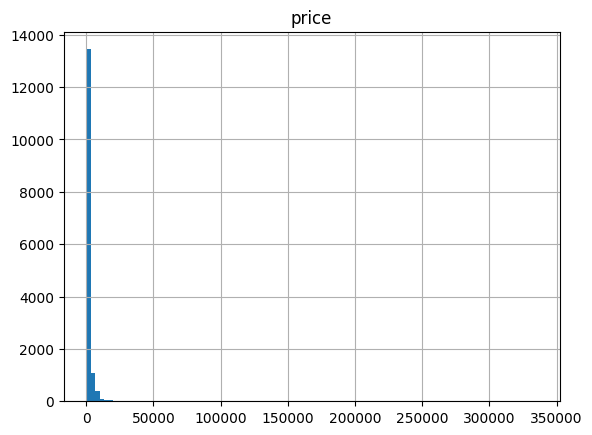

In [80]:
clean_airbnb.hist(column='price', bins=100)
# Setting the x-axis limit
# plt.xlim(0, 150000) 

No, the distrubution does not look normal. It is heavily skewed to the right. This skewness implies that most of the Airbnb listings are priced at the lower end, with fewer listings at extremely high prices. A log transformation would be most appropriate as it would help in normalizing the distribution and reduce the effect of the outliers or extreme values.

4.

In [81]:
clean_airbnb['bedrooms'].max()
clean_airbnb['bedrooms'] = clean_airbnb['bedrooms'].astype(int)
clean_airbnb.loc[clean_airbnb['bedrooms'] >= 4, 'bedrooms'] = 4

C:\Users\Gabriella Rivera\AppData\Local\Temp\ipykernel_1336\937070366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_airbnb['bedrooms'] = clean_airbnb['bedrooms'].astype(int)


In [82]:
print(clean_airbnb['bedrooms'].max())
clean_airbnb

4


,room_type,accommodates,bedrooms,price
0,Entire home/apt,3,1,1845.0
1,Private room,2,1,1275.0
2,Private room,2,1,800.0
3,Private room,2,1,800.0
4,Private room,2,1,1845.0
...,...,...,...,...
17035,Entire home/apt,4,1,664.0
17036,Entire home/apt,2,1,960.0
17037,Entire home/apt,5,2,3500.0
17038,Entire home/apt,2,1,1360.0


#### 2.2 Model

In [83]:
m1 = smf.ols('price ~ bedrooms', data = clean_airbnb).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     541.0
Date:                Wed, 15 May 2024   Prob (F-statistic):          1.25e-117
Time:                        19:45:20   Log-Likelihood:            -1.5590e+05
No. Observations:               15200   AIC:                         3.118e+05
Df Residuals:                   15198   BIC:                         3.118e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.9594    120.703     -1.698      0.090    -441.552      31.633
bedrooms    1895.0126     81.469     23.260      0.000    1735.323    2054.702
==============================================================================
Omnibus:                    36706.046   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        554556741.282
Skew:                          25.044   Prob(JB):                         0.00
Kurtosis:                     937.402   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept value of -204.9594 suggests that when the bedrooms coefficient is at 0, the price of an airbnb is -$204.9594. The P value for the intercept is 0.090, indicating that the intercept is not statistically significant. The bedrooms coefficient value of $1895.0126 suggests that each additional bedroom is associated with an increase of approximately $1895 in the listing price. The t-statistic for bedrooms is 23.260 with a p-value close to 0.000, indicating that the effect of bedrooms on price is statistically significant. This r2 value of 0.034 indicates that the model explains about 3.4% of the variance in the price. This is relatively low, suggesting that the number of bedrooms alone does not significantly predict the price, and there are other factors at play that affect the price of a listing.

In [84]:
m2 = smf.ols('np.log(price) ~ np.log(bedrooms)', data = clean_airbnb).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3879.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        19:45:20   Log-Likelihood:                -16913.
No. Observations:               15200   AIC:                         3.383e+04
Df Residuals:                   15198   BIC:                         3.385e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0144      0.007   1052.126      0.000       7.001       7.027
np.log(bedrooms)     0.9946      0.016     62.279      0.000       0.963       1.026
==============================================================================
Omnibus:                     3639.718   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16168.457
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       7.542   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This value indicates that the model explains about 20.3% of the variance in the logarithm of the price, which is a significant improvement from the 3.4% R-squared in the previous model where price was not log-transformed. This suggests that using the logarithmic scale for both variables improves the model's explanatory power and is a beter fit. The coefficient for np.log(bedrooms) can be interpreted as for a 1% increase in the number of bedrooms, there is an approximate 0.9946% increase in the price. This almost direct relationship indicates a very proportional impact of bedroom count on price in percentage terms. P-value for np.log(bedrooms): 0.000 indicates that the number of bedrooms has a statistically significant effect on the price at any conventional significance level.
Intercept: 7.0144 in a log-log model can be tricky to interpret directly in the context of the variables involved, but it essentially represents the factor that scales the relationship between the logarithm of the price and the logarithm of the bedrooms when the number of bedrooms approaches zero.

In [85]:
clean_airbnb['room_type'].value_counts()

room_type
Entire home/apt    8324
Private room       5467
Hotel room          751
Shared room         658
Name: count, dtype: int64

In [86]:
clean_airbnb.loc[clean_airbnb['accommodates'] >= 4, 'accommodates'] = 4
clean_airbnb['accommodates'].value_counts()

accommodates
2    7895
4    4568
3    2050
1     687
Name: count, dtype: int64

In [87]:
m3 = smf.ols('np.log(price) ~ np.log(bedrooms) + room_type + accommodates', data = clean_airbnb).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     965.5
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        19:45:20   Log-Likelihood:                -16544.
No. Observations:               15200   AIC:                         3.310e+04
Df Residuals:                   15194   BIC:                         3.315e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.8676      0.021    323.992      0.000       6.826       6.909
room_type[T.Hotel room]       0.1351      0.028      4.909      0.000       0.081       0.189
room_type[T.Private room]    -0.0541      0.013     -4.219      0.000      -0.079      -0.029
room_type[T.Shared room]     -0.7005      0.029    -23.821      0.000      -0.758      -0.643
np.log(bedrooms)              0.8267      0.019     42.588      0.000       0.789       0.865
accommodates                  0.0822      0.008     10.732      0.000       0.067       0.097
==============================================================================
Omnibus:                     4388.218   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22475.983
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       8.358   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Summary:**

- Dependent Variable: np.log(price)

- R-squared: 0.241
This indicates that approximately 24.1% of the variability in the logarithmic transformation of the price is explained by the model. This is a slight improvement from the previous model, suggesting that the addition of these variables adds some explanatory power.

**Coefficients:**

- Intercept: 6.8676

The intercept can be interpreted as the expected log price when all other variables are at their reference levels or zero.

- Room Type:

Reference(baseline) Category: 

Hotel Room: Coefficient of 0.1351 suggests that, holding other factors constant, being a hotel room is associated with a 13.51% increase in price compared to reference category

Private Room: Coefficient of -0.0541 indicates a decrease of 5.41% in price compared to the reference category.

Shared Room: Coefficient of -0.7005 indicates a decrease of 70.05% in price compared to the reference category.

- np.log(bedrooms): 0.8267

A 1% increase in bedrooms is associated with an approximate 0.8267% increase in price. This relationship remains strong and significant.

- Accommodates: 0.0822

Each additional person accommodated increases the expected log price by 8.22%.

**Statistical Significance:**
All variables are statistically significant with p-values of 0.000, indicating strong evidence against the null hypothesis for each predictor's effect on price.

### 3 Logistic Regression: Heart Attack

#### 3.1 Prepare Data

1.

In [88]:
heart = pd.read_csv('heart.csv.bz2', sep=',')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


2.

In [89]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [90]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [91]:
heart.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [92]:
heart.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [93]:
heart.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [94]:
heart.trtbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

In [95]:
heart.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [96]:
heart.fbs.value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [97]:
heart.restecg.value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [98]:
heart.thalachh.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [99]:
heart.exng.value_counts()

exng
0    204
1     99
Name: count, dtype: int64

In [100]:
heart.caa.value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [101]:
heart.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [102]:
percentage_heart_attack = (heart['output'] == 1).mean()
print(round(percentage_heart_attack, 2))

0.54


The percentage of heart attacks among these patients is 54%

3.

Nominal/Ordinal Variables: sex, cp, fbs, restecg, exng, output

#### 3.2 Logistic Regression

1.

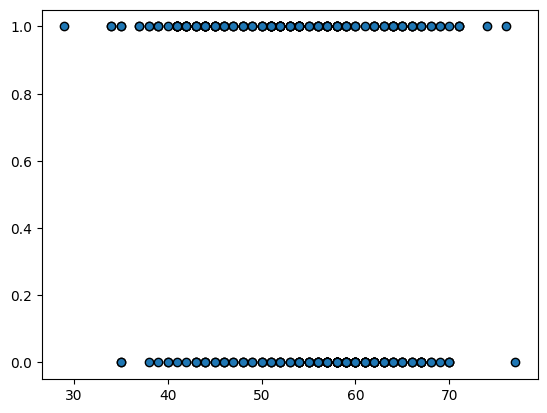

In [103]:
x = heart.age
y = heart.output
_ = plt.scatter(x, y, edgecolor = "k")

In [104]:
majority_class = heart['output'].mode()[0]  # This finds the most common outcome
naive_accuracy = (heart['output'] == majority_class).mean()
naive_accuracy

0.5445544554455446

2.

In [105]:
# Convert categorical variables to dummy/indicator variables
heart_dummies = pd.get_dummies(heart, columns=['cp', 'restecg', 'slp', 'thall'], dtype=int)
# heart_dummies = pd.get_dummies(heart, columns=['cp', 'restecg'])

# pd.set_option('display.max_columns', None)
# heart_dummies = heart_dummies.drop(columns=['slp', 'oldpeak', 'thall'])
# Display the new DataFrame with dummy variables
heart_dummies.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [106]:
# heart_dummies['cp_0'] = heart_dummies['cp_0'] + 0
# heart_dummies['cp_1'] = heart_dummies['cp_1'] + 0
# heart_dummies['cp_2'] = heart_dummies['cp_2'] + 0
# heart_dummies['cp_3'] = heart_dummies['cp_3'] + 0
# heart_dummies['restecg_0'] = heart_dummies['restecg_0'] + 0
# heart_dummies['restecg_1'] = heart_dummies['restecg_1'] + 0
# heart_dummies['restecg_2'] = heart_dummies['restecg_2'] + 0 
# heart_dummies['slp_0'] = heart_dummies['slp_0'] + 0
# heart_dummies['slp_1'] = heart_dummies['slp_1'] + 0 
# heart_dummies['slp_2'] = heart_dummies['slp_2'] + 0
# heart_dummies['thall_0'] = heart_dummies['thall_0'] + 0
# heart_dummies['thall_1'] = heart_dummies['thall_1'] + 0
# heart_dummies['thall_2'] = heart_dummies['thall_2'] + 0
# heart_dummies['thall_3'] = heart_dummies['thall_3'] + 0
# heart_dummies.head()

In [107]:
m = smf.logit("output ~ age + sex + trtbps + chol + fbs + thalachh + exng + oldpeak + caa + cp_0 + cp_1 + cp_2 + cp_3 + restecg_0 + restecg_1 + restecg_2 + slp_0 + slp_1 + slp_2 + thall_0 + thall_1 + thall_2 + thall_3", data= heart_dummies).fit()
m.summary()

         Current function value: 0.332828
         Iterations: 35


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  303
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           19
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.5171
Time:                        19:45:21   Log-Likelihood:                -100.85
converged:                      False   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.239e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5217        nan        nan        nan         nan         nan
age           -0.0006      0.024     -0.024      0.981      -0.047       0.046
sex           -1.5149      0.521     -2.906      0.004      -2.537      -0.493
trtbps        -0.0171      0.011     -1.596      0.111      -0.038       0.004
chol          -0.0043      0.004     -1.114      0.265      -0.012       0.003
fbs            0.1764      0.566      0.312      0.755      -0.933       1.286
thalachh       0.0171      0.011      1.596      0.111      -0.004       0.038
exng          -0.7631      0.426     -1.791      0.073      -1.598       0.072
oldpeak       -0.4893      0.226     -2.167      0.030      -0.932      -0.047
caa           -0.8332      0.204     -4.078      0.000      -1.234      -0.433
cp_0          -0.8557   1.56e+07   -5.5e-08      1.000   -3.05e+07    3.05e+07
cp_1           0.1276   1.54e+07    8.3e-09      1.000   -3.01e+07    3.01e+07
cp_2           1.0896   1.53e+07    7.1e-08      1.000   -3.01e+07    3.01e+07
cp_3           1.1603   1.61e+07    7.2e-08      1.000   -3.16e+07    3.16e+07
restecg_0      0.4094        nan        nan        nan         nan         nan
restecg_1      0.9796        nan        nan        nan         nan         nan
restecg_2      0.1327        nan        nan        nan         nan         nan
slp_0          0.6799        nan        nan        nan         nan         nan
slp_1         -0.0397        nan        nan        nan         nan         nan
slp_2          0.8815        nan        nan        nan         nan         nan
thall_0       -0.6549        nan        nan        nan         nan         nan
thall_1        1.1598        nan        nan        nan         nan         nan
thall_2        1.1984        nan        nan        nan         nan         nan
thall_3       -0.1816        nan        nan        nan         nan         nan
==============================================================================
"""

3.

a) 

The coefficient for age is -0.0006. A negative coefficient indicates that as age increases, the probability of having a heart attack decreases.
However, the magnitude of this coefficient is very small, suggesting that the effect of age on the probability of a heart attack is very slight.

The p-value for age is 0.981.
In this case, the p-value of 0.981 is much greater than 0.05, meaning that the effect of age on the probability of a heart attack is not statistically significant.

b)

The coefficient for sex is -1.5149. In this dataset, sex is likely coded as 1 for male and 0 for female.
A negative coefficient indicates that being male (sex = 1) is associated with a lower probability of having a heart attack compared to being female (sex = 0).

The p-value of 0.004 is much less than 0.05, meaning that the effect of sex on the probability of a heart attack is statistically significant.

In [108]:
b0 = 1.5217
b1 = -1.5149
sex_male = 1
y = b0 + b1 * sex_male
pr_m = 1/(1 + np.exp(-y))
pr_m

0.5016999934493637

In [109]:
b0 = 1.5217
b1 = -1.5149
sex_female = 0
y = b0 + b1 * sex_female
pr_f = 1/(1 + np.exp(-y))
pr_f

0.820788677836263

In [110]:
pr_diff = pr_f - pr_m
pr_diff

0.3190886843868993

Women are about 31.9% more likely to have a heart attack than men.

c)

No, higher blood pressure is not significantly associated with more heart attacks. The coefficient of -0.0171 means that for each unit increase in resting blood pressure (trtbps), the log-odds of having a heart attack decreases by 0.0171, which is not much but still a decrease. The p-value for the coefficient of trtbps is 0.111, which indicates that the association between resting blood pressure and heart attacks is not statistically significant.

d)

In [111]:
b0 = 1.5217
b1 = -0.8557
cp_0 = 1
y = b0 + b1 * cp_0
pr_cp1 = 1/(1 + np.exp(-y))
pr_cp1

0.6606069144942678

In [112]:
b0 = 1.5217
b1 = 1.0896
cp_2 = 1
y = b0 + b1 * cp_2
pr_cp3 = 1/(1 + np.exp(-y))
pr_cp3

0.9315852971471074

In [113]:
cp_diff = pr_cp3 - pr_cp1
cp_diff

0.2709783826528396

A heart attack is approximately 27.09% less likely for a person with chest pain of type 1 compared to someone with chest pain of type 3

In [114]:
# Coefficients for chest pain types
beta_cp1 = -0.8557
beta_cp3 = 1.1603

# Calculate the difference in coefficients
diff = beta_cp1 - beta_cp3

# Calculate the odds ratio
odds_ratio = np.exp(diff)
odds_ratio

0.1331871496005706

The odds ratio of 0.1334 indicates that  someone with chest pain type 1 is significantly less likely to have a heart attack compared to someone with chest pain type 3. Specifically, they are about 86.66% less likely (since 1 − 0.1334 = 0.8666)

e) 

The reference category for rest ECG (restecg) is 'normal'

None of the categories (restecg_1, restecg_2, restecg_3) are statistically significant predictors of a heart attack, as all p-values are greater than 0.05.
This means there is no significant difference in the probability of a heart attack when comparing the reference category (normal ECG) to any of the other restecg categories, and the type of ECG (whether normal or showing abnormalities) is not a statistically significant predictor of a heart attack.